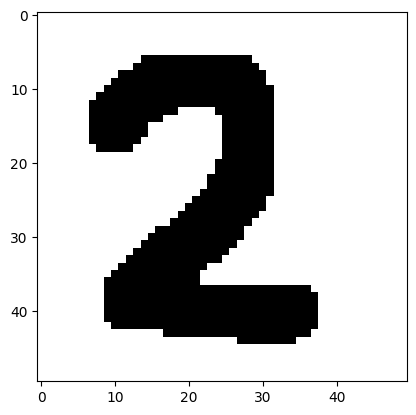

In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

'''
read the image in grayscale and display it
'''
img = cv2.imread("dvojka.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')


In [78]:
def getStart():
   start = [0, 0]
   flag_found = False
   for x in range(img.shape[0]):
      for y in range(img.shape[1]):
         if img[x, y] == 0:
            start = [x, y]
            flag_found = True
            break
      if flag_found:
         break;   
   return start

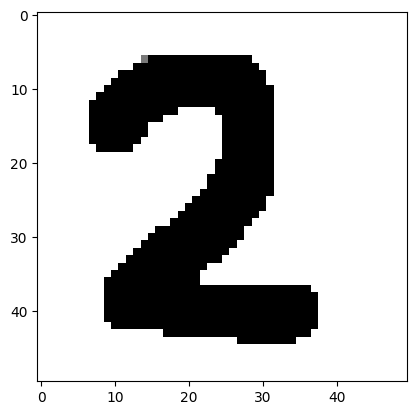

In [79]:
start = getStart()
img[start[0], start[1]] = 122
plt.imshow(img, cmap='gray')

In [80]:
'''
returns neigbouring point in a given direction
'''
def getNext(point, direction):
    next = point.copy()
    if direction == 0:
        next = [point[0], point[1]+1]
    if direction == 1:
        next = [point[0]-1, point[1]]
    if direction == 2:
        next = [point[0], point[1]-1]

    if direction == 3:
        next = [point[0]+1, point[1]]
    


    return next 

[6, 14]
[[6, 14], [7, 14], [7, 13], [8, 13], [8, 12], [8, 11], [9, 11], [9, 10], [10, 10], [10, 9], [11, 9], [11, 8], [12, 8], [12, 7], [13, 7], [14, 7], [15, 7], [16, 7], [17, 7], [17, 8], [18, 8], [18, 9], [18, 10], [18, 11], [18, 12], [17, 12], [17, 13], [16, 13], [16, 14], [15, 14], [14, 14], [14, 15], [14, 16], [13, 16], [13, 17], [13, 18], [12, 18], [12, 19], [12, 20], [12, 21], [12, 22], [12, 23], [12, 24], [13, 24], [13, 25], [14, 25], [15, 25], [16, 25], [17, 25], [18, 25], [19, 25], [20, 25], [20, 24], [21, 24], [22, 24], [22, 23], [23, 23], [24, 23], [24, 22], [25, 22], [25, 21], [26, 21], [26, 20], [27, 20], [27, 19], [28, 19], [28, 18], [29, 18], [29, 17], [29, 16], [30, 16], [30, 15], [31, 15], [31, 14], [32, 14], [32, 13], [33, 13], [33, 12], [34, 12], [34, 11], [35, 11], [35, 10], [36, 10], [36, 9], [37, 9], [38, 9], [39, 9], [40, 9], [41, 9], [41, 10], [42, 10], [42, 11], [42, 12], [42, 13], [42, 14], [42, 15], [42, 16], [42, 17], [43, 17], [43, 18], [43, 19], [43, 20]

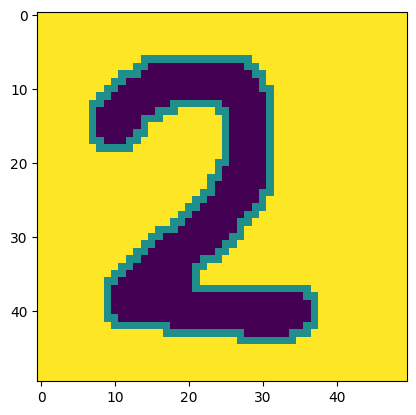

In [81]:
borderPoints = []
borderPoints.append(start)
aktPoint = start.copy()

print (aktPoint)

end = False
smer = 3
while not end:
   smer = (smer + 3) % 4
   next_point = getNext(aktPoint, smer)
   while img[next_point[0], next_point[1]] == 255:
       smer = (smer+1) % 4
       next_point = getNext(aktPoint, smer)
   aktPoint = next_point
   if aktPoint == start:
       end = True    

   borderPoints.append(aktPoint)
    

print (borderPoints)

for p in borderPoints:
    img[p[0], p[1]] = 127

plt.imshow(img)
print ("Border length:", len(borderPoints))